# Activation Functions - dimensions

In [9]:
import torch.nn

m = torch.nn.Softmax(dim=1)
img = torch.randn(1, 2, 3)
model_output = m(img)

print(img)
print(model_output)

tensor([[[-0.0512,  0.0511,  0.0087],
         [-0.0934, -1.7486,  0.4311]]])
tensor([[[0.5105, 0.8581, 0.3960],
         [0.4895, 0.1419, 0.6040]]])


# Rampup function visualisation

0.009568922283839675


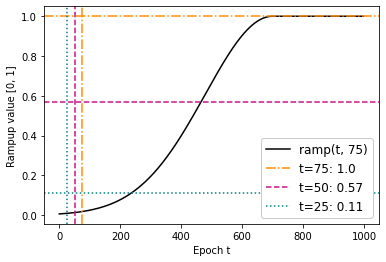

In [30]:
import numpy as np
import matplotlib.pyplot as plt

currents = range(0, 1000)
rampup_length = 700

results = []
for current in currents:
    current = np.clip(current, 0.0, rampup_length)
    result = float(np.exp(-5.0 * (1.0 - current / rampup_length) ** 2))
    results.append(result)

print(results[25])
    
plt.figure()
plt.plot(currents, results, color = 'k', label = "ramp(t, 75)")
plt.xlabel("Epoch t")
plt.ylabel("Rampup value [0, 1]")
plt.axvline(x = 75, color = 'darkorange', label = 't=75: 1.0', linestyle = '-.')
plt.axhline(y = 1, color = 'darkorange', linestyle = '-.')
plt.axvline(x = 50, color = 'mediumvioletred', label = 't=50: 0.57', linestyle = '--')
plt.axhline(y = 0.57, color = 'mediumvioletred', linestyle = '--')
plt.axvline(x = 25, color = 'teal', label = 't=25: 0.11', linestyle = ':')
plt.axhline(y = 0.11, color = 'teal', linestyle = ':')
plt.legend(loc = 'lower right', facecolor="white", framealpha=1, fontsize="large")
plt.savefig("example_results/rampup.png", dpi=1200)


# dict from keys

In [47]:
b_keys = [  'loss',
            'acc', 'fscore', 'fmicro', 'jac', 'prec', 'rec',
            'symhd' # task specific: segmentation
        ]

# everything we want to track
batch_collector = { key : [] for key in b_keys }

print(batch_collector)

for i in range(5):
    batch_collector["loss"].append(4)
    # batch_collector["acc"] = 1.0

print(batch_collector)

{'loss': [], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}
{'loss': [4, 4, 4, 4, 4], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}


In [48]:
Details = {"Destination": "China", 
           "Nationality": "Italian", "Age": []}

for i in range(5):
    Details["Age"].append(2) # [20, "Twenty"]
    
print(Details)

{'Destination': 'China', 'Nationality': 'Italian', 'Age': [2, 2, 2, 2, 2]}


In [76]:
for key in batch_collector.keys():
    print(key, np.mean(batch_collector[key]))
    

loss 4.0
acc nan
fscore nan
fmicro nan
jac nan
prec nan
rec nan
symhd nan


In [46]:
# set of vowels
keys = {'a', 'e', 'i', 'o', 'u' }

# assign empty list to value
value = []

# creates a dictionary with keys and values
vowels = { key : [] for key in keys }

vowels["a"].append("hi")

print(vowels)

{'a': ['hi'], 'o': [], 'u': [], 'i': [], 'e': []}


# Grid Search

In [77]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Domain shift dependent on two features

done domain 1
done domain 2


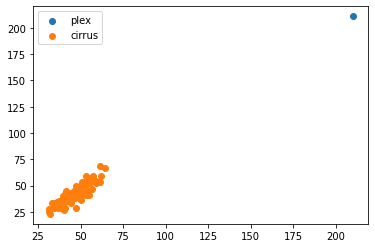

In [26]:
import glob
import skimage.io
import numpy as np

domain1 = glob.glob('C:/snec_data/Result_Data/cirrus/enface/*_cube_z.tif')
domain2 = glob.glob('C:/snec_data/Result_Data/plex/enface/*_cube_z.tif')


domain1 = glob.glob('C:/Users/Prinzessin/projects/image_data/iChallenge_AMD_OD_Fovea_lesions/images_AMD/*.jpg')
# domain2 = glob.glob('C:/Users/Prinzessin/projects/image_data/iChallenge_AMD_OD_Fovea_lesions/images_Non-AMD/*.jpg')


mean1 = []
mean2 = []

median1 = []
median2 = []

for path in domain1:
    #print(path)
    image = skimage.io.imread(path)
    mean1.append(np.mean(image))
    median1.append(np.median(image))    
print("done domain 1")    

for path in domain2:
    #print(path)
    image = skimage.io.imread(path)
    mean2.append(np.mean(image))
    median2.append(np.median(image))
print("done domain 2")    
    
import matplotlib.pyplot as plt

#print(mean2)
#print(median2)

#print(mean1)
#print(median1)
    
plt.figure()
plt.scatter(mean2, median2, label="plex")
plt.scatter(mean1, median1, label="cirrus")

plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(mean2, median2, label="plex")
plt.scatter(mean1, median1, label="cirrus")

plt.legend()
plt.show()